import class bandit and other functions from bandits.py

In [2]:
from bandits import Bandit, multi_armed_bandit, show_result, get_result, get_performance
import pandas as pd
import numpy as np
from tqdm import trange
import seaborn as sns
import warnings 
import random
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

Import data from EU dataset and US dataset

In [3]:
import pickle
with open('./dataset/EU_data.pickle', 'rb') as handle:
    data_EU = pickle.load(handle)

In [4]:
with open('./dataset/USStockData.pickle', 'rb') as handle:
    data_US = pickle.load(handle)

Performance on the EU dataset

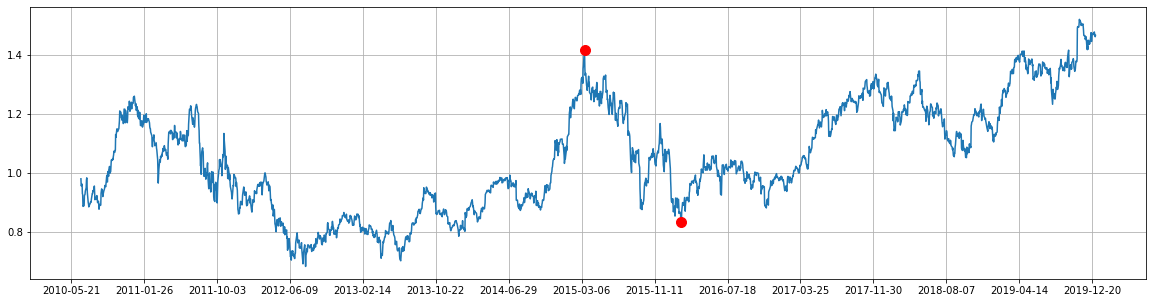

In [48]:
result, df0 = multi_armed_bandit(data_EU, epsilon=0.1,step_size=0.1, sample_averages=True, UCB_param=None, gradient=False, gradient_baseline=False)    
show_result(df0,result)

In [6]:
performance_e = pd.DataFrame()
for i in trange(500):
    result, df0 = multi_armed_bandit(data_EU, epsilon=0.1,step_size=0.1, sample_averages=True, UCB_param=None, gradient=False, gradient_baseline=False)    
    net_value = get_result(df0,result)
    performance_e = performance_e.append(get_performance(net_value))    
    
performance_UCB = pd.DataFrame()
for i in trange(500):
    result, df0 = multi_armed_bandit(data_EU, epsilon=0.1,step_size=0.1, sample_averages=True, UCB_param=2, gradient=False, gradient_baseline=False)    
    net_value = get_result(df0,result)
    performance_UCB = performance_UCB.append(get_performance(net_value))    

performance_gradient = pd.DataFrame()
for i in trange(500):
    result, df0 = multi_armed_bandit(data_EU, epsilon=0.1,step_size=0.1, sample_averages=True, UCB_param=2, gradient=False, gradient_baseline=False)    
    net_value = get_result(df0,result)
    performance_gradient = performance_gradient.append(get_performance(net_value))    


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [03:23<00:00,  2.46it/s]


Since the bandit is a random algorithm, we use Monte Carlo Simulation to simulate 500 times and generate the evaluator of the strategy.
 
  
   
   
    






In [7]:
performance_e.mean()

Aunnualized Return             0.088928
Annualized Volatility          0.257559
Downside Deviation             0.187814
Max Drawdown(in percentage)    0.349639
Max Drawdown(in dollars)       1.041196
Sharpe Ratio                   0.344047
Sortino Ratio                  0.473899
dtype: float64

In [8]:
performance_UCB.mean()

Aunnualized Return             0.072108
Annualized Volatility          0.258847
Downside Deviation             0.186903
Max Drawdown(in percentage)    0.343982
Max Drawdown(in dollars)       0.945552
Sharpe Ratio                   0.278499
Sortino Ratio                  0.389044
dtype: float64

In [9]:
performance_gradient.mean()

Aunnualized Return             0.074552
Annualized Volatility          0.259310
Downside Deviation             0.186711
Max Drawdown(in percentage)    0.338483
Max Drawdown(in dollars)       0.940655
Sharpe Ratio                   0.287985
Sortino Ratio                  0.403598
dtype: float64

Text(0.5, 1.0, 'Gradient')

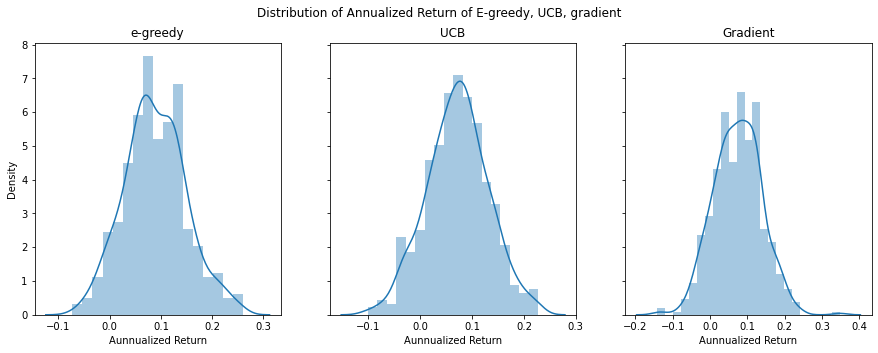

In [24]:
## plot the kernel histogram of Annualzed return for strategy epsilon greedy
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Distribution of Annualized Return of E-greedy, UCB, gradient')

sns.distplot(performance_e['Aunnualized Return'], hist = True, kde = True, label = 'e-greedy', ax=axes[0])
axes[0].set_title('e-greedy')

sns.distplot(performance_UCB['Aunnualized Return'], hist =  True, kde = True, label = 'UCB', ax=axes[1])
axes[1].set_title('UCB')

sns.distplot(performance_gradient['Aunnualized Return'], hist =  True, kde = True,label = 'gradient', ax=axes[2])
axes[2].set_title('Gradient')


Performance on US dataset

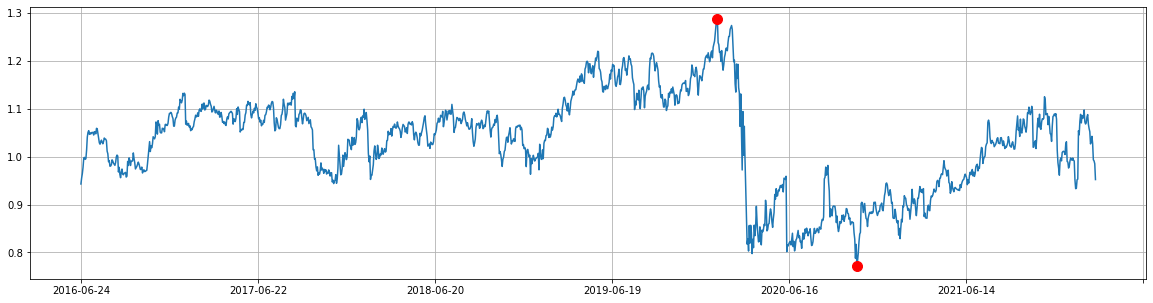

In [52]:
result, df0 = multi_armed_bandit(data_US, epsilon=0.1,step_size=0.1, sample_averages=True, UCB_param=None, gradient=False, gradient_baseline=False, America=True)    
show_result(df0,result)

In [25]:
performance_e = pd.DataFrame()
for i in trange(500):
    result, df0 = multi_armed_bandit(data_US, epsilon=0.1,step_size=0.1, sample_averages=True, UCB_param=None, gradient=False, gradient_baseline=False, America = True)    
    net_value = get_result(df0,result)
    performance_e = performance_e.append(get_performance(net_value))    
    
performance_UCB = pd.DataFrame()
for i in trange(500):
    result, df0 = multi_armed_bandit(data_US, epsilon=0.1,step_size=0.1, sample_averages=True, UCB_param=2, gradient=False, gradient_baseline=False, America = True)    
    net_value = get_result(df0,result)
    performance_UCB = performance_UCB.append(get_performance(net_value))    

performance_gradient = pd.DataFrame()
for i in trange(500):
    result, df0 = multi_armed_bandit(data_US, epsilon=0.1,step_size=0.1, sample_averages=True, UCB_param=2, gradient=False, gradient_baseline=False, America = True)    
    net_value = get_result(df0,result)
    performance_gradient = performance_gradient.append(get_performance(net_value))    

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [02:03<00:00,  4.05it/s]


In [26]:
performance_e.mean()

Aunnualized Return             0.093669
Annualized Volatility          0.331763
Downside Deviation             0.195906
Max Drawdown(in percentage)    0.293719
Max Drawdown(in dollars)       1.116377
Sharpe Ratio                   0.338658
Sortino Ratio                  0.494220
dtype: float64

In [27]:
performance_UCB.mean()

Aunnualized Return             0.121693
Annualized Volatility          0.312371
Downside Deviation             0.189206
Max Drawdown(in percentage)    0.331689
Max Drawdown(in dollars)       1.011529
Sharpe Ratio                   0.436186
Sortino Ratio                  0.664635
dtype: float64

In [28]:
performance_gradient.mean()

Aunnualized Return             0.124347
Annualized Volatility          0.315594
Downside Deviation             0.188475
Max Drawdown(in percentage)    0.311644
Max Drawdown(in dollars)       1.045958
Sharpe Ratio                   0.449481
Sortino Ratio                  0.687214
dtype: float64

Text(0.5, 1.0, 'Gradient')

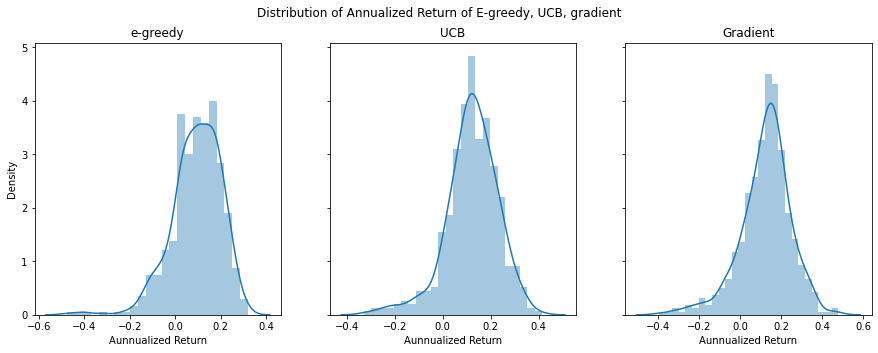

In [29]:
## plot the kernel histogram of Annualzed return for strategy epsilon greedy
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Distribution of Annualized Return of E-greedy, UCB, gradient')

sns.distplot(performance_e['Aunnualized Return'], hist = True, kde = True, label = 'e-greedy', ax=axes[0])
axes[0].set_title('e-greedy')

sns.distplot(performance_UCB['Aunnualized Return'], hist =  True, kde = True, label = 'UCB', ax=axes[1])
axes[1].set_title('UCB')

sns.distplot(performance_gradient['Aunnualized Return'], hist =  True, kde = True,label = 'gradient', ax=axes[2])
axes[2].set_title('Gradient')


Other strategy for comparasion:

Equal Weighted portfolio

Momentum Factor based portfolio

In [5]:
from strategy import mom, EW

Momentum strategy ON EU dataset

Annualized Return:  10.307049705421418 %
Annualized Volatility:  27.881012025859587 %
Downside Deviation:  20.966130504877775 %
Max Drawdown(in percentage):  22.176567124799472 %
Max Drawdown(in dollars):  1.6870331999999997
Sharpe Ratio:  0.3696798988451943
Sortino Ratio:  0.49160476717549195


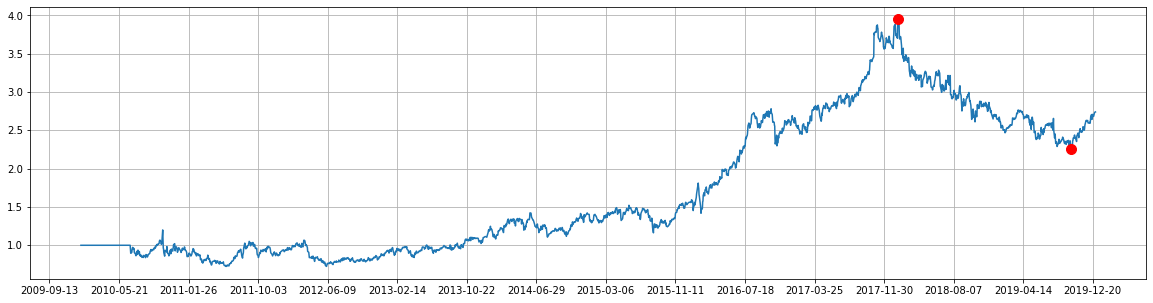

In [32]:
mom(data_EU) ##Momentum strategy ON EU dataset

Momentum strategy ON US dataset

Annualized Return:  31.116476098345565 %
Annualized Volatility:  36.136673867480965 %
Downside Deviation:  25.392843850312772 %
Max Drawdown(in percentage):  17.166464806345772 %
Max Drawdown(in dollars):  2.385027
Sharpe Ratio:  0.8610774808012137
Sortino Ratio:  1.2254033570155747


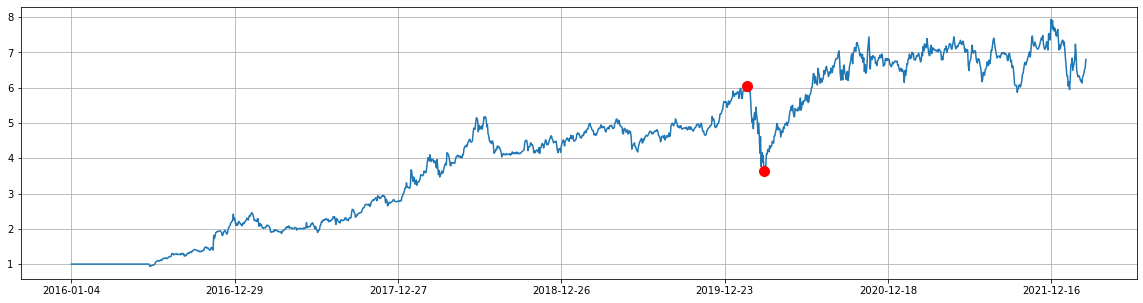

In [33]:
mom(data_US, America=True) ##Momentum strategy ON US dataset

Equal weight strategy ON EU dataset

Annualized Return:  12.021949421051636 %
Annualized Volatility:  17.6927059743236 %
Downside Deviation:  12.85263699757879 %
Max Drawdown(in percentage):  32.61247185613683 %
Max Drawdown(in dollars):  0.5048437766522211
Sharpe Ratio:  0.679486192699884
Sortino Ratio:  0.9353683157251199


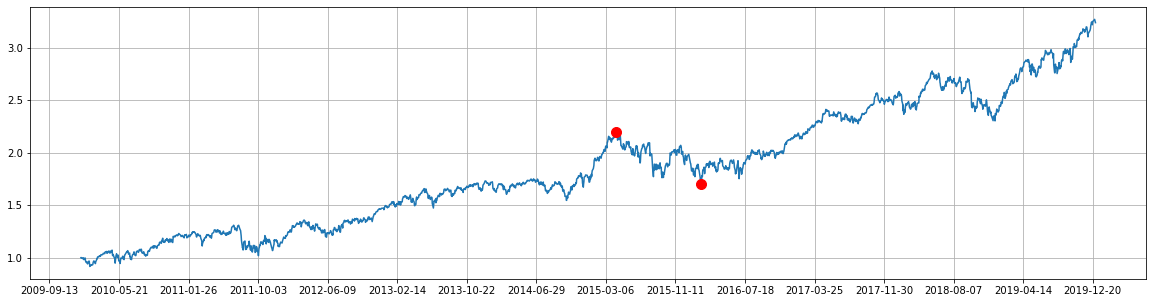

In [6]:
EW(data_EU) ##Equal weight strategy ON EU dataset

Equal weight strategy ON US dataset

Annualized Return:  16.25735178256979 %
Annualized Volatility:  19.81375893981574 %
Downside Deviation:  13.994067790600065 %
Max Drawdown(in percentage):  31.53270638847824 %
Max Drawdown(in dollars):  0.6074515109801091
Sharpe Ratio:  0.8205082050282061
Sortino Ratio:  1.1617316727227798


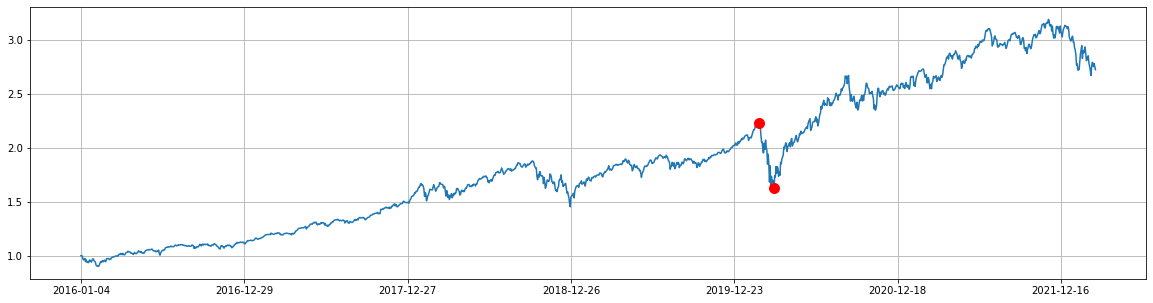

In [9]:
EW(data_US, America = True)##Equal weight strategy ON US dataset